In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Load the dataset
train=pd.read_csv('/content/train_ctrUa4K.csv')

In [110]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [111]:
#Getting info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [112]:
# Checking the missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [113]:
#Creating a fillna function
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [114]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].median())

In [115]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [116]:
# Outliers detection
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [117]:
new_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

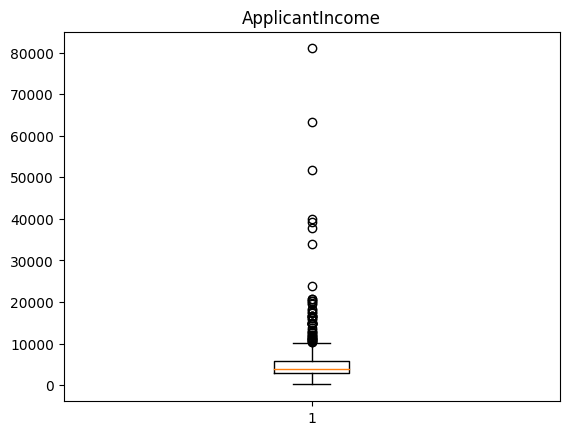

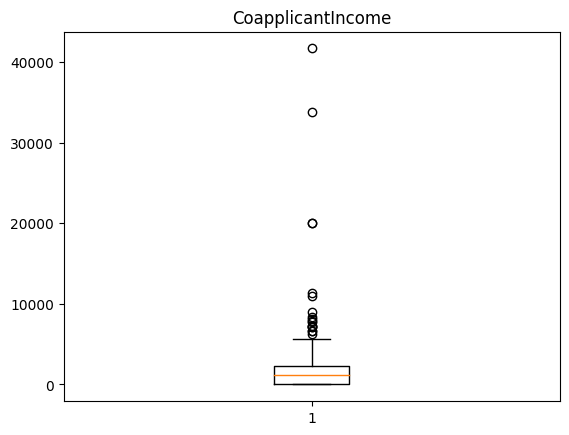

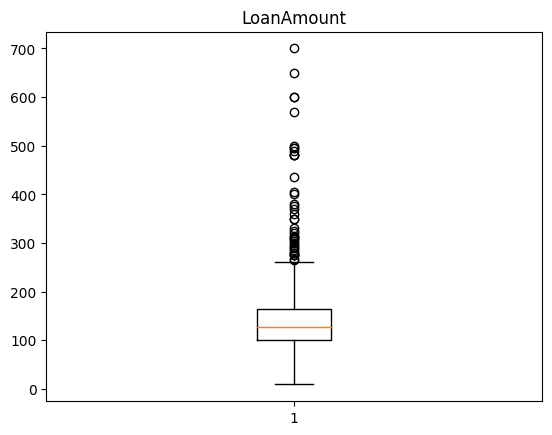

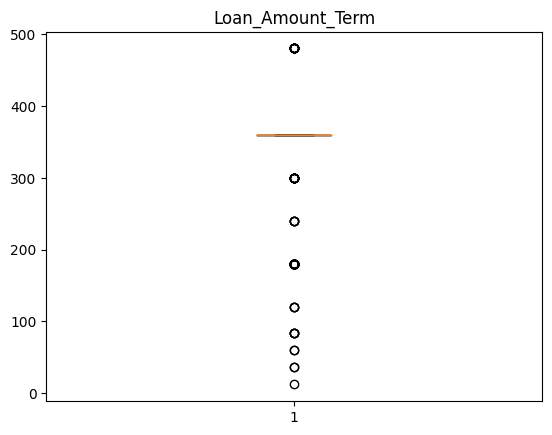

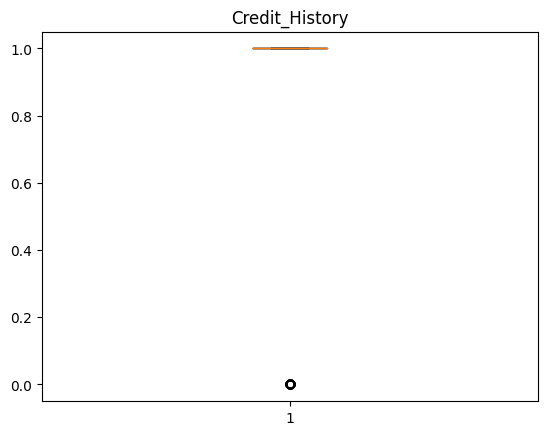

In [118]:
for i in new_column:
  plt.figure(i)
  plt.boxplot(train[i])
  plt.title(i);


In [119]:
new_columns2 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [120]:
# IQR outliers test
for j in new_columns2:
    Q1=np.percentile(train[j],25,method='midpoint')
    Q2=np.percentile(train[j],50,method='midpoint')
    Q3=np.percentile(train[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in train[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    train[j]=train[j].clip(lower=low_lim,upper=up_lim)

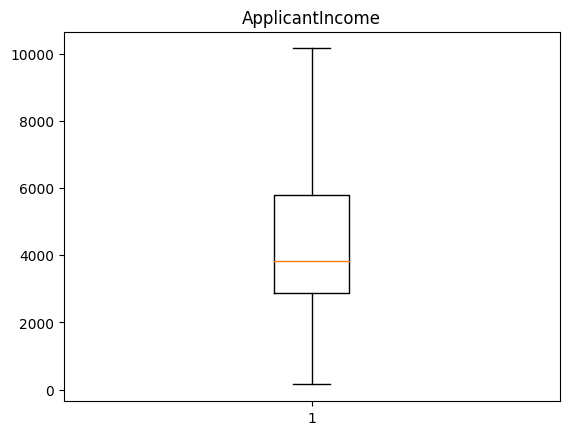

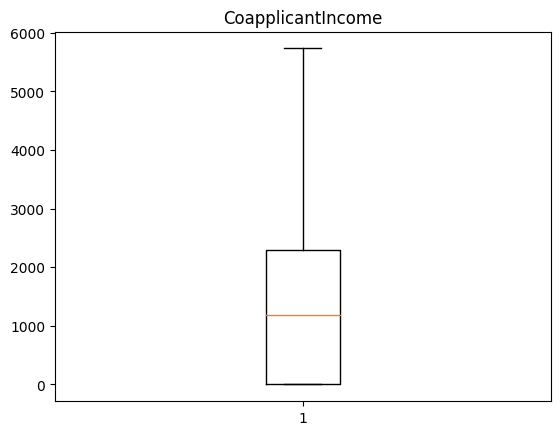

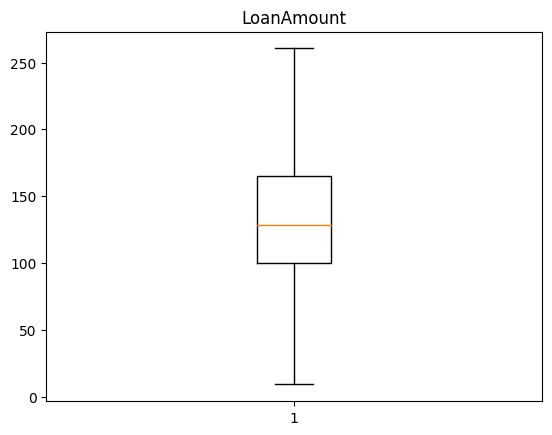

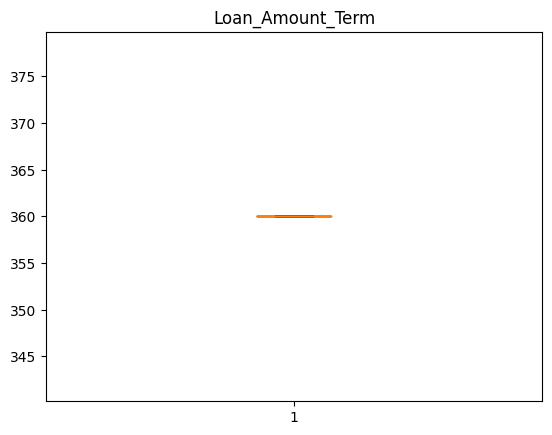

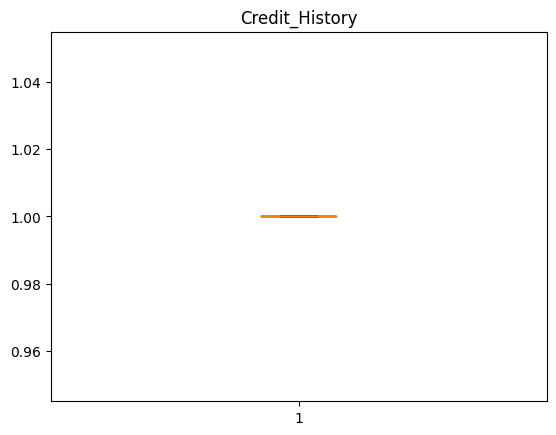

In [121]:
new_columns3 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in new_columns3:
  plt.figure(i)
  plt.boxplot(train[i])
  plt.title(i)

In [131]:
X_train = train.drop('Loan_Status',axis=1)
y_train = train['Loan_Status']

In [132]:
X_train_encode = pd.get_dummies(X_train)

In [133]:
X_train_encode.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_ID_LP002959,Loan_ID_LP002960,Loan_ID_LP002961,Loan_ID_LP002964,Loan_ID_LP002974,Loan_ID_LP002978,Loan_ID_LP002979,Loan_ID_LP002983,Loan_ID_LP002984,Loan_ID_LP002990
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encode)
X_train_scaled = pd.DataFrame(X_train_encode)

In [137]:
X_train_scaled.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_ID_LP002959,Loan_ID_LP002960,Loan_ID_LP002961,Loan_ID_LP002964,Loan_ID_LP002974,Loan_ID_LP002978,Loan_ID_LP002979,Loan_ID_LP002983,Loan_ID_LP002984,Loan_ID_LP002990
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.0,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,4615.910423,1419.354104,137.298860,360.0,1.0,...,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629
std,0.386497,0.476373,1.009623,0.413389,0.340446,2477.158964,1623.678913,55.631264,0.0,0.0,...,0.040357,0.040357,0.040357,0.040357,0.040357,0.040357,0.040357,0.040357,0.040357,0.040357
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,360.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10156.500000,5731.250000,260.500000,360.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [139]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [142]:
print("\nModel Training and Evaluation:")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"{name} Accuracy on Train Data: {accuracy_train}")


Model Training and Evaluation:
Logistic Regression Accuracy on Train Data: 0.6921824104234527


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN Accuracy on Train Data: 0.7312703583061889
SVM Accuracy on Train Data: 0.6872964169381107
Decision Tree Accuracy on Train Data: 1.0
Random Forest Accuracy on Train Data: 1.0


In [165]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"{name} Accuracy on Train Data: {accuracy_train}")
 # Calculate precision, recall, F1 score, and confusion matrix
    print(f"\n{name} Metrics:")
    print(classification_report(y_train, y_pred_train))
    print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_pred_train)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy on Train Data: 0.6921824104234527

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.59      0.05      0.10       192
           1       0.70      0.98      0.81       422

    accuracy                           0.69       614
   macro avg       0.64      0.52      0.46       614
weighted avg       0.66      0.69      0.59       614

Confusion Matrix:
[[ 10 182]
 [  7 415]]
KNN Accuracy on Train Data: 0.7312703583061889

KNN Metrics:
              precision    recall  f1-score   support

           0       0.62      0.35      0.45       192
           1       0.75      0.90      0.82       422

    accuracy                           0.73       614
   macro avg       0.69      0.63      0.64       614
weighted avg       0.71      0.73      0.71       614

Confusion Matrix:
[[ 68 124]
 [ 41 381]]
SVM Accuracy on Train Data: 0.6872964169381107

SVM Metrics:
              precision    recall  f1-score   sup

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Accuracy on Train Data: 1.0

Random Forest Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Confusion Matrix:
[[192   0]
 [  0 422]]


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [168]:
#Load the dataset
test=pd.read_csv('/content/test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [170]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [171]:
# checking the missing values
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [148]:
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

In [149]:
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].median())

In [150]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [151]:
#Ouliers
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

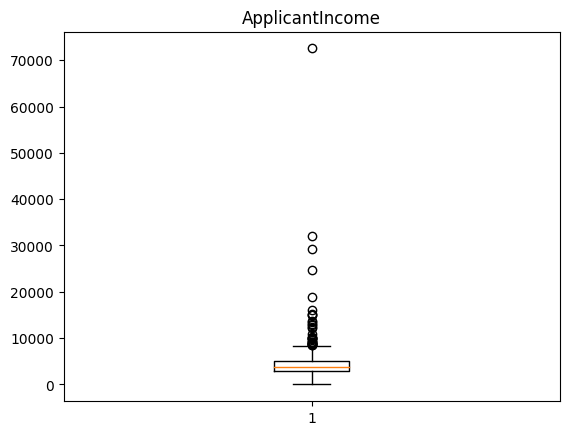

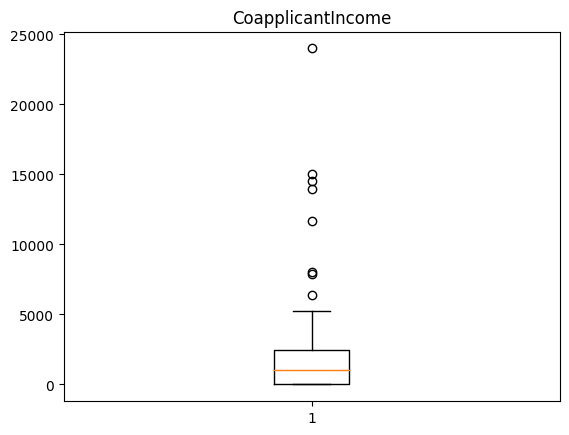

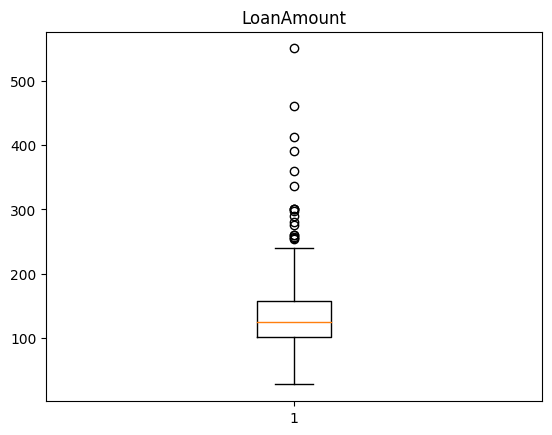

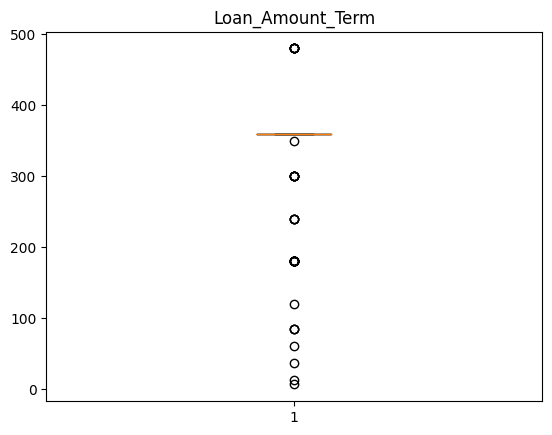

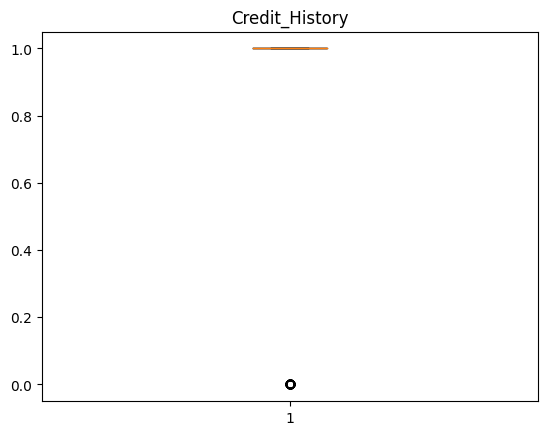

In [152]:
new_columns4 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in new_columns4:
  plt.figure(i)
  plt.boxplot(test[i])
  plt.title(i);

In [157]:
new_columns5 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for j in new_columns5:
    Q1=np.percentile(test[j],25,method='midpoint')
    Q2=np.percentile(test[j],50,method='midpoint')
    Q3=np.percentile(test[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in train[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    test[j]=test[j].clip(lower=low_lim,upper=up_lim)

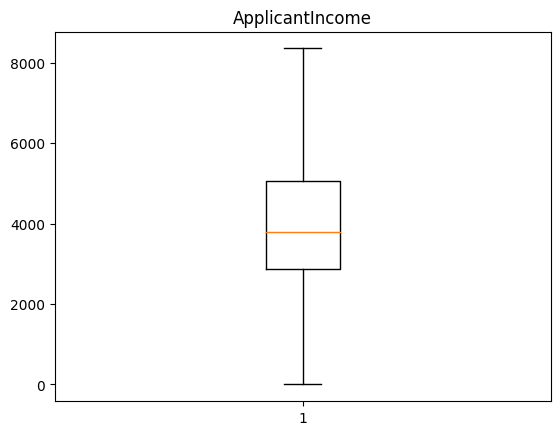

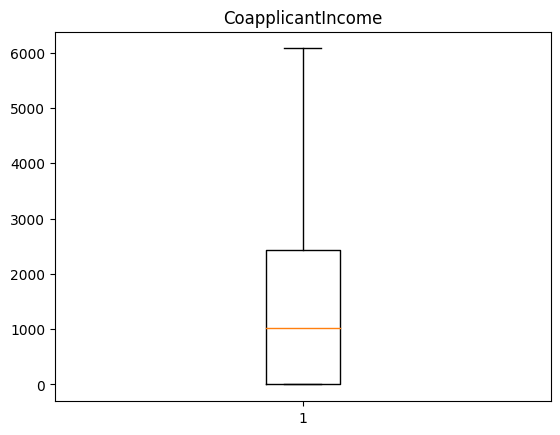

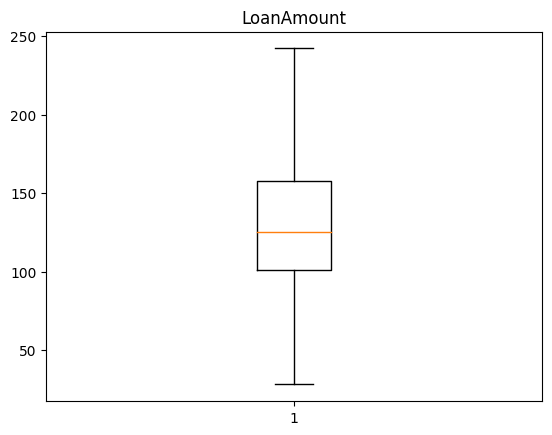

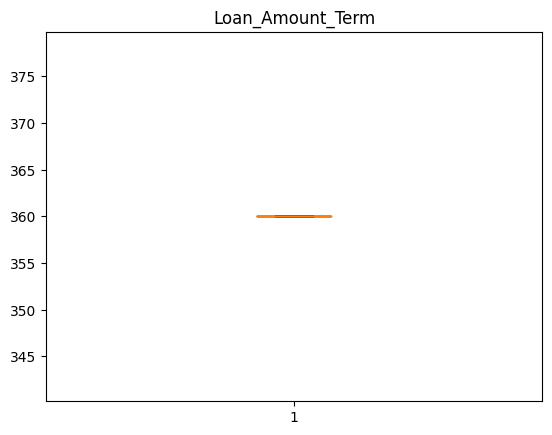

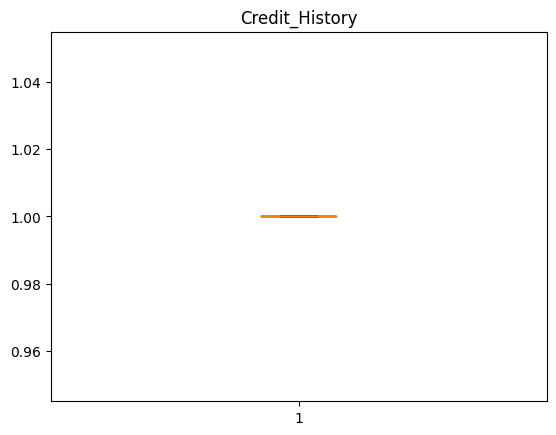

In [158]:
new_columns6 = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in new_columns6:
  plt.figure(i)
  plt.boxplot(test[i])
  plt.title(i);

In [184]:
#Seperate features and the target variable
X_train = train.drop('Loan_Status',axis=1)
y_train = train['Loan_Status']
X_test = test.copy()

In [179]:
X_test_encode = pd.get_dummies(X_test)

In [180]:
X_test_encode.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,360.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500.0,126.0,360.0,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800.0,208.0,360.0,1.0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546.0,100.0,360.0,1.0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
4,3276,0.0,78.0,360.0,1.0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1


In [181]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_encode)
X_test_scaled = pd.DataFrame(X_test_encode)

In [182]:
X_test_scaled

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0.0,110.0,360.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500.0,126.0,360.0,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800.0,208.0,360.0,1.0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546.0,100.0,360.0,1.0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
4,3276,0.0,78.0,360.0,1.0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,113.0,360.0,1.0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
363,4158,709.0,115.0,360.0,1.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
364,3250,1993.0,126.0,360.0,1.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
365,5000,2393.0,158.0,360.0,1.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [175]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [183]:
# I am taking Random forest as best model
# Fine tuning
# (Hyperparameter tuning for Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [177]:
print("\nBest Parameters for Random Forest:", grid_search.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [187]:
#Adding sample submission file to the work sheet
sample_submission = pd.read_csv('/content/sample_submission_49d68Cx.csv')

In [189]:
sample_submission.head(10)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
5,LP001054,N
6,LP001055,N
7,LP001056,N
8,LP001059,N
9,LP001067,N


In [190]:
sample_submission['Loan_Status'] = predictions

NameError: name 'predictions' is not defined